In [ ]:
# This Notebook was authored by Tanish Saxena
# Github - https://github.com/tanxena
# Kaggle - https://www.kaggle.com/tanxena
# Linkedin - https://www.linkedin.com/in/tanxena/

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

pd.set_option('display.max_columns', None)

## Reading dataset (.csv)

In [2]:
forest = pd.read_csv('/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_M6_96619.csv')
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


## Data exploration

In [3]:
# print(forest.shape) ## checking shape of the dataset
# print("-------------------------------------------------------------------------------------")
# print(forest.columns) ## checking columns
# print("-------------------------------------------------------------------------------------")
# print(forest.isnull().sum()) ## checking for null values
# print("-------------------------------------------------------------------------------------")
# print(forest.describe()) ## checking info 
# print("-------------------------------------------------------------------------------------")
# print(forest.head()) ## checking first five entries 

## Data Preprocessing

In [4]:
y = forest['confidence']
forest = forest.drop(['confidence'], axis = 1)

### dropping the columns with constant value (instrument and version)

In [5]:
# forest['version'].describe()
# forest['instrument'].describe()
# they only have one constant value, so they can be dropped

forest = forest.drop(['instrument', 'version'], axis = 1) 
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,298.8,27.6,D,0


### encoding daynight and satellite

In [6]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,1,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,1,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,1,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,1,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,1,298.8,27.6,1,0


### encoding 'type' column [removed]

In [7]:
forest['type'].value_counts()

type
0    35666
2      335
3       10
Name: count, dtype: int64

In [8]:
# types = pd.get_dummies(forest['type'])
# forest = pd.concat([forest, types], axis=1)
# forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

# forest = forest.drop(['type_0'], axis = 1) 

# forest = forest.drop(['type'], axis = 1)
# forest.head()

# forest['type'] = forest['type'].apply(lambda x: 1 if x != 0 else 0)

### encoding acquired date column

In [9]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [10]:
forest['year'] = forest['acq_date'].dt.year
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day
forest = forest.drop(['acq_date'], axis=1)
forest.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,bright_t31,frp,daynight,type,year,month,day
0,-11.8070,142.0583,313.0,1.0,1.0,56,1,297.3,6.6,1,0,2019,8,1
1,-11.7924,142.0850,319.3,1.0,1.0,56,1,297.3,11.3,1,0,2019,8,1
2,-12.8398,132.8744,311.6,3.1,1.7,57,1,298.7,23.1,1,0,2019,8,1
3,-14.4306,143.3035,310.1,1.1,1.1,57,1,296.1,6.5,1,0,2019,8,1
4,-12.4953,131.4897,310.3,4.0,1.9,57,1,298.8,27.6,1,0,2019,8,1


In [11]:
forest['month'].nunique()

2

In [12]:
months = pd.get_dummies(forest['month'])
forest = pd.concat([forest, months], axis=1)
forest = forest.rename(columns={8: 'August'})

forest.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,bright_t31,frp,daynight,type,year,month,day,August,9
0,-11.8070,142.0583,313.0,1.0,1.0,56,1,297.3,6.6,1,0,2019,8,1,True,False
1,-11.7924,142.0850,319.3,1.0,1.0,56,1,297.3,11.3,1,0,2019,8,1,True,False
2,-12.8398,132.8744,311.6,3.1,1.7,57,1,298.7,23.1,1,0,2019,8,1,True,False
3,-14.4306,143.3035,310.1,1.1,1.1,57,1,296.1,6.5,1,0,2019,8,1,True,False
4,-12.4953,131.4897,310.3,4.0,1.9,57,1,298.8,27.6,1,0,2019,8,1,True,False


In [13]:
forest = forest.drop(['month', 9], axis=1)
forest.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,bright_t31,frp,daynight,type,year,day,August
0,-11.8070,142.0583,313.0,1.0,1.0,56,1,297.3,6.6,1,0,2019,1,True
1,-11.7924,142.0850,319.3,1.0,1.0,56,1,297.3,11.3,1,0,2019,1,True
2,-12.8398,132.8744,311.6,3.1,1.7,57,1,298.7,23.1,1,0,2019,1,True
3,-14.4306,143.3035,310.1,1.1,1.1,57,1,296.1,6.5,1,0,2019,1,True
4,-12.4953,131.4897,310.3,4.0,1.9,57,1,298.8,27.6,1,0,2019,1,True


In [14]:
forest['year'].nunique()

1

In [15]:
forest = forest.drop(['year'], axis=1)
forest.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,bright_t31,frp,daynight,type,day,August
0,-11.8070,142.0583,313.0,1.0,1.0,56,1,297.3,6.6,1,0,1,True
1,-11.7924,142.0850,319.3,1.0,1.0,56,1,297.3,11.3,1,0,1,True
2,-12.8398,132.8744,311.6,3.1,1.7,57,1,298.7,23.1,1,0,1,True
3,-14.4306,143.3035,310.1,1.1,1.1,57,1,296.1,6.5,1,0,1,True
4,-12.4953,131.4897,310.3,4.0,1.9,57,1,298.8,27.6,1,0,1,True


<Axes: >

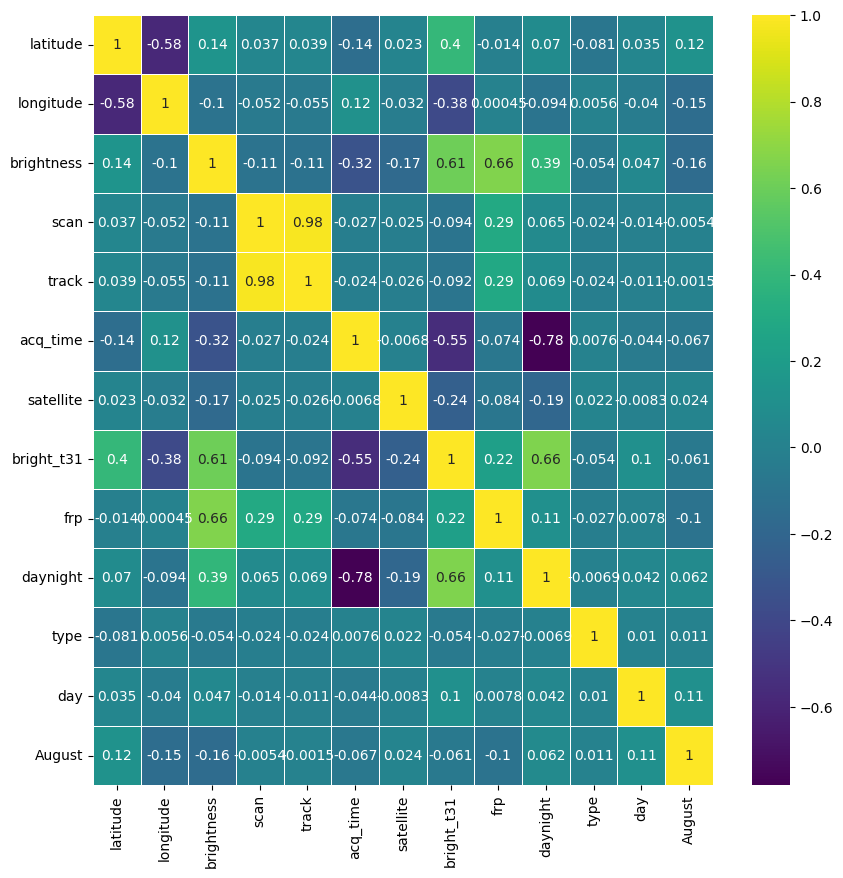

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

### dropping some of the highly correlated columns

In [17]:
forest = forest.drop(['scan', 'acq_time'], axis = 1) 

In [18]:
forest.head()

,latitude,longitude,brightness,track,satellite,bright_t31,frp,daynight,type,day,August
0,-11.8070,142.0583,313.0,1.0,1,297.3,6.6,1,0,1,True
1,-11.7924,142.0850,319.3,1.0,1,297.3,11.3,1,0,1,True
2,-12.8398,132.8744,311.6,1.7,1,298.7,23.1,1,0,1,True
3,-14.4306,143.3035,310.1,1.1,1,296.1,6.5,1,0,1,True
4,-12.4953,131.4897,310.3,1.9,1,298.8,27.6,1,0,1,True


### brightness column

In [19]:
forest['brightness'].quantile([0, 0.25, .75, .9])

0.00    300.0
0.25    316.5
0.75    336.7
0.90    351.0
Name: brightness, dtype: float64

In [20]:
def bright_categorize(brightness):
     
    if brightness < 316.5:
        return 'Low'
    elif 336.7 <= brightness <= 351.0:
        return 'High'
    else:
        return 'Extreme'

forest['brightness_temperature'] = forest['brightness'].apply(bright_categorize)
forest['brightness_temperature'] = forest['brightness_temperature'].map({'Low':0, 'High':1, 'Extreme':2})
forest.head()

,latitude,longitude,brightness,track,satellite,bright_t31,frp,daynight,type,day,August,brightness_temperature
0,-11.8070,142.0583,313.0,1.0,1,297.3,6.6,1,0,1,True,0
1,-11.7924,142.0850,319.3,1.0,1,297.3,11.3,1,0,1,True,2
2,-12.8398,132.8744,311.6,1.7,1,298.7,23.1,1,0,1,True,0
3,-14.4306,143.3035,310.1,1.1,1,296.1,6.5,1,0,1,True,0
4,-12.4953,131.4897,310.3,1.9,1,298.8,27.6,1,0,1,True,0


### dropping some of the highly correlated columns

In [21]:
forest = forest.drop(['brightness'], axis = 1) 

### categorizing area

In [22]:
def area_categorize(row):
    longitude = row['longitude']
    latitude = row['latitude']
    
    if longitude < 122.8051765 or -30.000233 < latitude < -25.760321:
        return 'Western Australia'
    elif 122.8051765 < longitude < 132.551000 or -20.917574 < latitude < 19.4914:
        return 'Northern Territory'
    elif 132.551000 < longitude < 136.209152 or -31.840233 < latitude < -30.000233:
        return 'South Australia'
    elif 144.964600 < longitude < 145.612793 or -37.020100 < latitude < -31.840233:
        return 'New South Wales'
    elif 142.702789 < longitude < 144.964600 or latitude < -37.020100:
        return 'Victoria'
    elif 136.209152 < longitude < 142.702789 or -25.760321 < latitude < -20.917574:
        return 'Queensland'
    else:
        return 'Unidentified'

forest['Area of Fire'] = forest.apply(area_categorize, axis=1)
forest['Area of Fire'] = forest['Area of Fire'].map({'Western Australia':0, 'Queensland':1, 'South Australia':2, 'New South Wales':3, 'Northern Territory':4, 'Victoria':5, 'Unindentified':6})
forest.head()

,latitude,longitude,track,satellite,bright_t31,frp,daynight,type,day,August,brightness_temperature,Area of Fire
0,-11.8070,142.0583,1.0,1,297.3,6.6,1,0,1,True,0,4
1,-11.7924,142.0850,1.0,1,297.3,11.3,1,0,1,True,2,4
2,-12.8398,132.8744,1.7,1,298.7,23.1,1,0,1,True,0,4
3,-14.4306,143.3035,1.1,1,296.1,6.5,1,0,1,True,0,4
4,-12.4953,131.4897,1.9,1,298.8,27.6,1,0,1,True,0,4


In [23]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [24]:
# forest = forest.drop(['longitude', 'latitude'], axis = 1) ## makes score much worse

In [25]:
print(forest.shape)
forest.head()

(36011, 12)


,latitude,longitude,track,satellite,bright_t31,frp,daynight,type,day,August,brightness_temperature,Area of Fire
0,-11.8070,142.0583,1.0,1,297.3,6.6,1,0,1,True,0,4
1,-11.7924,142.0850,1.0,1,297.3,11.3,1,0,1,True,2,4
2,-12.8398,132.8744,1.7,1,298.7,23.1,1,0,1,True,0,4
3,-14.4306,143.3035,1.1,1,296.1,6.5,1,0,1,True,0,4
4,-12.4953,131.4897,1.9,1,298.8,27.6,1,0,1,True,0,4


In [26]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

### PCA for brightness_temperature, bright_t31, daynight

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns_for_pca = ['brightness_temperature', 'bright_t31', 'daynight']

data_for_pca = forest[columns_for_pca]

scaler = StandardScaler()
data_for_pca_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=1)

principal_components = pca.fit_transform(data_for_pca_scaled)

columns_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
principal_components_df = pd.DataFrame(data=principal_components, columns=columns_pca)

forest = pd.concat([forest, principal_components_df], axis=1)


forest.head()

,latitude,longitude,track,satellite,bright_t31,frp,daynight,type,day,August,brightness_temperature,Area of Fire,PC1
0,-11.8070,142.0583,1.0,1,297.3,6.6,1,0,1,True,0,4,-0.787224
1,-11.7924,142.0850,1.0,1,297.3,11.3,1,0,1,True,2,4,0.470017
2,-12.8398,132.8744,1.7,1,298.7,23.1,1,0,1,True,0,4,-0.700585
3,-14.4306,143.3035,1.1,1,296.1,6.5,1,0,1,True,0,4,-0.861487
4,-12.4953,131.4897,1.9,1,298.8,27.6,1,0,1,True,0,4,-0.694396


In [28]:
forest = forest.drop(['bright_t31','daynight','brightness_temperature'], axis =1)

<Axes: >

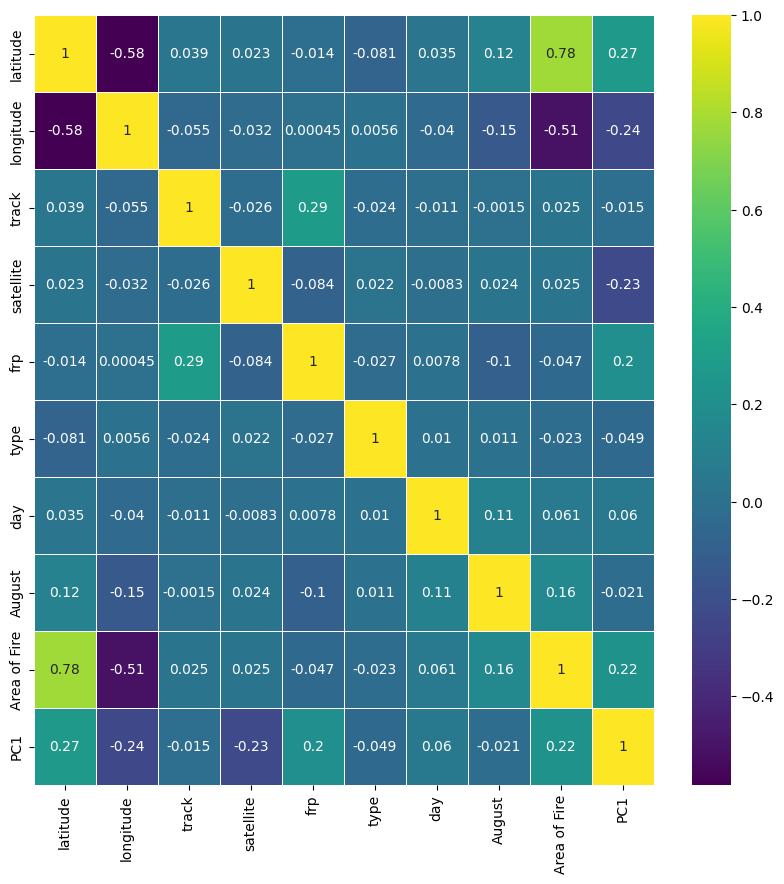

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [30]:
forest.head()

,latitude,longitude,track,satellite,frp,type,day,August,Area of Fire,PC1
0,-11.8070,142.0583,1.0,1,6.6,0,1,True,4,-0.787224
1,-11.7924,142.0850,1.0,1,11.3,0,1,True,4,0.470017
2,-12.8398,132.8744,1.7,1,23.1,0,1,True,4,-0.700585
3,-14.4306,143.3035,1.1,1,6.5,0,1,True,4,-0.861487
4,-12.4953,131.4897,1.9,1,27.6,0,1,True,4,-0.694396


## models

In [31]:
#                  Model  R^2 Score
# 0   RandomForestRegressor   0.659779
# 1            XGBRegressor   0.676966
# 2   DecisionTreeRegressor   0.358149
# 3       CatBoostRegressor   0.680053
# 4           LGBMRegressor   0.669609
# 5                   Ridge   0.444760
# 6              ElasticNet   0.402565
# 7        LinearRegression   0.444743
# 8          HuberRegressor   0.394670
# 9         RANSACRegressor   0.070776
# 10                    SVR   0.207761

### catboost

In [32]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1500, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, verbose= False)
# cat_model = CatBoostRegressor(verbose = False) # Overall R2 Score: 0.6805733998479097


# CatBoost - Number of finished trials:  100
# Best trial:
# Value:  0.6406311794233024
# Params: 
#     iterations: 856
#     learning_rate: 0.02701105826591619
#     depth: 8

In [33]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import r2_score

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# predictions = np.zeros(len(forest))

# for train_index, test_index in kf.split(forest):
#     X_train, X_test = forest.iloc[train_index], forest.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     cat_model.fit(X_train, y_train)
#     fold_preds = cat_model.predict(X_test)
#     fold_r2 = r2_score(y_test, fold_preds)
#     print(f"R2 Score for this fold: {fold_r2}")

#     predictions[test_index] += fold_preds

# final_r2 = r2_score(y, predictions)
# print(f"\nOverall R2 Score: {final_r2}")

# # with type_2, type_3 cols: 69.6
# # no preprocessing on type: Overall R2 Score: 0.6968078601663359
# # with true / false on type: Overall R2 Score: 0.696181835132154

# # removed preprocessing from Month column: same result as best one in previous col

# # removed preprocessing from Regions column: Overall R2 Score: 0.6968506062929187

# # trying with week column instead of day: much worse score
# # trying with week column instead of day, but didnt drop day this time: Overall R2 Score: 0.6966895236667476


### voting regressor

In [34]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Assuming you have your 'forest' and 'y' dataframes

# Create instances of CatBoostRegressor, XGBRegressor, and LGBMRegressor with similar hyperparameters
cat_model = CatBoostRegressor(iterations=1500, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, verbose=False)
xgb_model = XGBRegressor(n_estimators=1500, max_depth=10, learning_rate=0.05, objective='reg:squarederror', random_state=42, verbosity=0)
lgb_model = lgb.LGBMRegressor(n_estimators=1500, max_depth=10, learning_rate=0.05, objective='regression', random_state=42)

# Create a list of base models
base_models = [('cat', cat_model), ('xgb', xgb_model), ('lgb', lgb_model)]

# Create an instance of VotingRegressor with multiple base models
voting_model = VotingRegressor(base_models)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

predictions = np.zeros(len(forest))

for train_index, test_index in kf.split(forest):
    X_train, X_test = forest.iloc[train_index], forest.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    voting_model.fit(X_train, y_train)
    fold_preds = voting_model.predict(X_test)
    fold_r2 = r2_score(y_test, fold_preds)
    print(f"R2 Score for this fold: {fold_r2}")

    predictions[test_index] += fold_preds

final_r2 = r2_score(y, predictions)
print(f"\nOverall R2 Score: {final_r2}")

#  Overall R2 Score: 0.7009705410740779
# # cat_model = CatBoostRegressor(iterations=1500, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, verbose=False)
# # xgb_model = XGBRegressor(n_estimators=1500, max_depth=10, learning_rate=0.05, objective='reg:squarederror', random_state=42, verbosity=0)
# # lgb_model = lgb.LGBMRegressor(n_estimators=1500, max_depth=10, learning_rate=0.05, objective='regression', random_state=42)
# # base_models = [('cat', cat_model), ('xgb', xgb_model), ('lgb', lgb_model)]
# # voting_model = VotingRegressor(base_models)

R2 Score for this fold: 0.7164302627795743
R2 Score for this fold: 0.6980834125172858
R2 Score for this fold: 0.688432744869425
R2 Score for this fold: 0.7023873660850692
R2 Score for this fold: 0.6991525915221923

Overall R2 Score: 0.7009705410740779


In [35]:
# from sklearn.ensemble import VotingRegressor, RandomForestRegressor, BaggingRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# import lightgbm as lgb
# from sklearn.model_selection import KFold
# from sklearn.metrics import r2_score
# import numpy as np

# # Assuming you have your 'forest' and 'y' dataframes

# # Create instances of CatBoostRegressor, XGBRegressor, LGBMRegressor, and RandomForestRegressor
# cat_model = CatBoostRegressor(iterations=1500, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, verbose=False)
# xgb_model = XGBRegressor(n_estimators=1500, max_depth=10, learning_rate=0.05, objective='reg:squarederror', random_state=42, verbosity=0)
# lgb_model = lgb.LGBMRegressor(n_estimators=1500, max_depth=10, learning_rate=0.05, objective='regression', random_state=42)
# rf_model = RandomForestRegressor(n_estimators=1500, max_depth=10, random_state=42)

# # Create a list of base models
# base_models = [('cat', cat_model), ('xgb', xgb_model), ('lgb', lgb_model), ('rf', rf_model)]

# # Create an instance of VotingRegressor with multiple base models
# voting_model = VotingRegressor(base_models)

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# predictions = np.zeros(len(forest))

# for train_index, test_index in kf.split(forest):
#     X_train, X_test = forest.iloc[train_index], forest.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     voting_model.fit(X_train, y_train)
#     fold_preds = voting_model.predict(X_test)
#     fold_r2 = r2_score(y_test, fold_preds)
#     print(f"R2 Score for this fold: {fold_r2}")

#     predictions[test_index] += fold_preds

# final_r2 = r2_score(y, predictions)
# print(f"\nOverall R2 Score: {final_r2}")

In [36]:
# from sklearn.ensemble import BaggingRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

# bagging_model = BaggingRegressor(cat_model, n_estimators=10, random_state=42)

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# predictions = np.zeros(len(forest))

# for train_index, test_index in kf.split(forest):
#     X_train, X_test = forest.iloc[train_index], forest.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     bagging_model.fit(X_train, y_train)
#     fold_preds = bagging_model.predict(X_test)
#     fold_r2 = r2_score(y_test, fold_preds)
#     print(f"R2 Score for this fold: {fold_r2}")

#     predictions[test_index] += fold_preds

# final_r2 = r2_score(y, predictions)
# print(f"\nOverall R2 Score: {final_r2}")

In [37]:
# cat_model.save_model('/kaggle/working/output_model.cbm', format="cbm",export_parameters=None, pool=None)